# Figures

Prepared for "The American Jobs Plan" presentation for the UW Now series on April 13, 2021. 

The file 'cycle dates pasted.csv' is from [data.nber.org/data/cycles/](http://data.nber.org/data/cycles/). The file 'intshare.csv' was created on FRED and downloaded (I was in a hurry). All other data are accessed from the FRED database.

Kim J. Ruhl 

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf  

C:\Users\kimru\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Business cycle dates
cycle = pd.read_csv('cycle dates pasted.csv')
cycle.peak = pd.to_datetime(cycle.peak)
cycle.trough = pd.to_datetime(cycle.trough)

### The personal savings rate

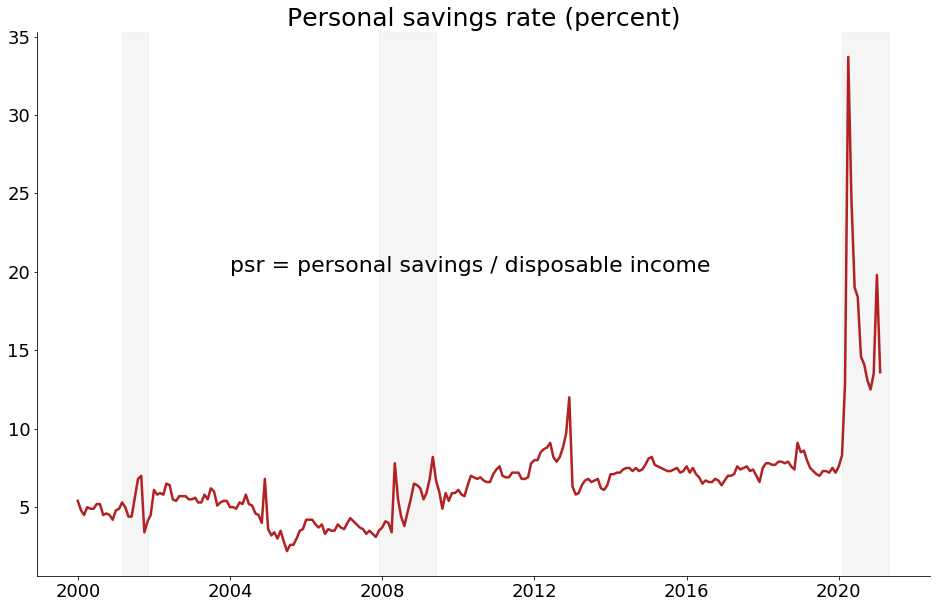

In [3]:
save = web.DataReader('PSAVERT', 'fred', start = '2000-01-01')

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(save.index, save.PSAVERT, lw=2.5, color='firebrick')

ax.tick_params(axis='both', labelsize=18 )
ax.set_title('Personal savings rate (percent)', fontsize=25)

ax.text(dt.datetime(2004,1,1), 20, 'psr = personal savings / disposable income', fontsize=22)

for c in [32,33]:
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)
plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

sns.despine()
plt.savefig('save.svg', bbox_inches='tight')

### GDP

In [4]:
gdp = web.DataReader(['GDPC1', 'GDP'], 'fred', start = '2010-01-01')
gdp['t'] = range(1,gdp.shape[0]+1) # create a time variable for the trend line
gdp.head(1)

,GDPC1,GDP,t
DATE,,,
2010-01-01,15415.145,14721.35,1


In [5]:
# Real
# Simple linear trend line up to 2020/01/01
res = smf.ols('GDPC1 ~ t', data=gdp.loc[:'2020-01-01']).fit()
gdp['fitr'] = res.fittedvalues

# Continue the trendline past 2020/01/01
gdp['predr']=res.predict(gdp.loc['2020-01-01':]) 

In [6]:
# Nominal
# Simple linear trend line up to 2020/01/01
res = smf.ols('GDP ~ t', data=gdp.loc[:'2020-01-01']).fit()
gdp['fitn'] = res.fittedvalues

# Continue the trendline past 2020/01/01
gdp['predn']=res.predict(gdp.loc['2020-01-01':])

In [7]:

print('Trend is {0:5,.0f} and actual is {1:5,.0f}.'.format(gdp.loc['2020-10-01', 'predn'],gdp.loc['2020-10-01', 'GDP']))
print('The difference is {:5,.0f}.'.format(gdp.loc['2020-10-01', 'predn'] - gdp.loc['2020-10-01', 'GDP']))

Trend is 22,118 and actual is 21,495.
The difference is   623.


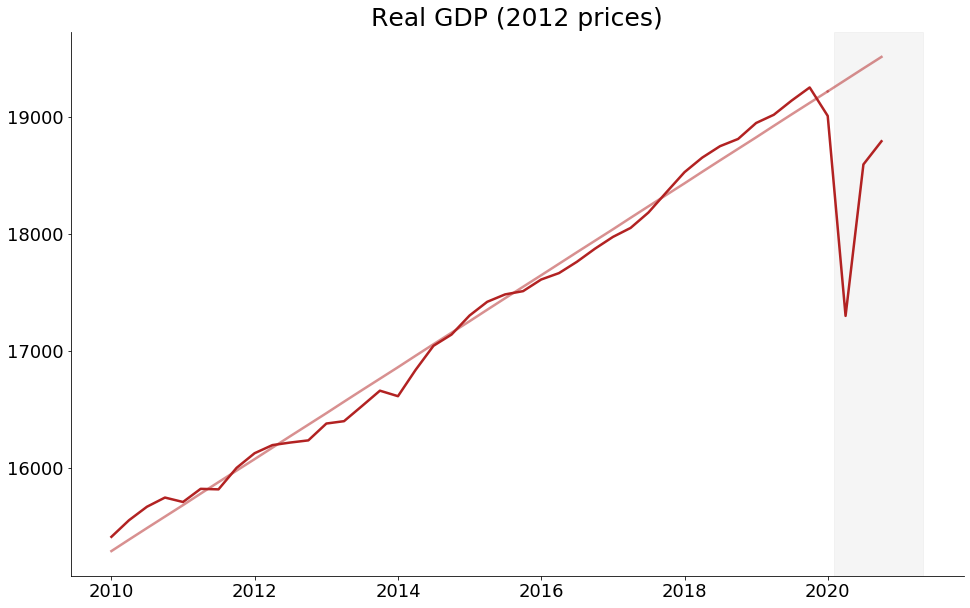

In [8]:
from matplotlib.patches import Ellipse
el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(gdp.index, gdp.GDPC1, lw=2.5, color='firebrick')
ax.plot(gdp.index, gdp.fitr, lw=2.5, color='firebrick', alpha=0.5)
ax.plot(gdp.index, gdp.predr, lw=2.5, color='firebrick', alpha=0.5)
ax.tick_params(axis='both', labelsize=18 )
ax.set_title('Real GDP (2012 prices)', fontsize=25)

plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

sns.despine()
plt.savefig('gdpr.svg', bbox_inches='tight')

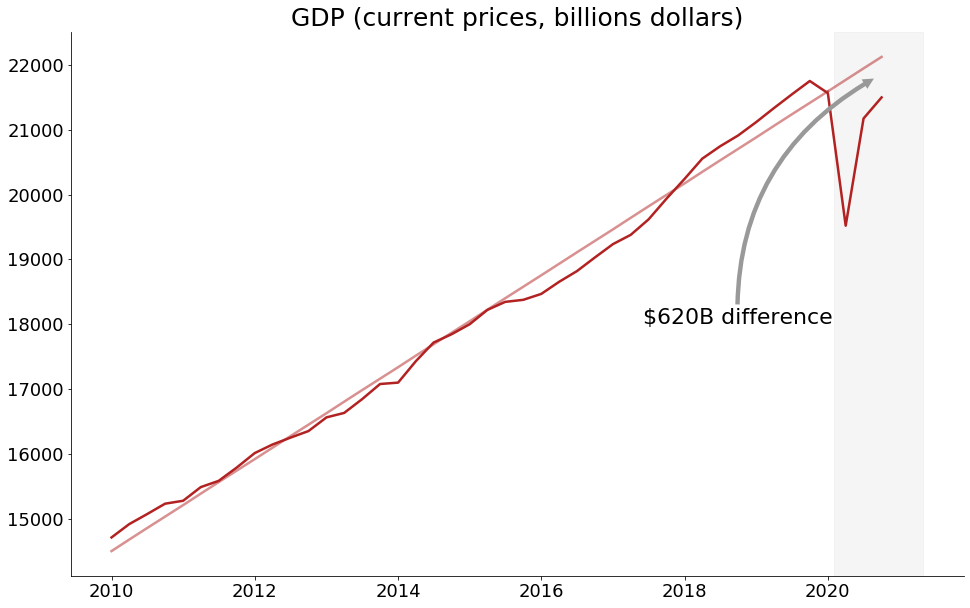

In [9]:
from matplotlib.patches import Ellipse
el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(gdp.index, gdp.GDP, lw=2.5, color='firebrick')
ax.plot(gdp.index, gdp.fitn, lw=2.5, color='firebrick', alpha=0.5)
ax.plot(gdp.index, gdp.predn, lw=2.5, color='firebrick', alpha=0.5)
ax.tick_params(axis='both', labelsize=18 )
ax.set_title('GDP (current prices, billions dollars)', fontsize=25)

plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

ax.annotate('$620B difference', xy=(dt.datetime(2020,9,1), 21800), xytext=(dt.datetime(2017,6,1),18000),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=-0.3"), fontsize=22
            )
sns.despine()
plt.savefig('gdp.svg', bbox_inches='tight')

### Inflation

In [10]:
p = web.DataReader(['PCEPILFE','CPILFESL','CPIAUCSL'], 'fred', start = '2004-01-01')
p['inf'] = p['PCEPILFE'].pct_change(12)*100
p['infc'] = p['CPILFESL'].pct_change(12)*100
p['infca'] = p['CPIAUCSL'].pct_change(12)*100
p.tail(1)

,PCEPILFE,CPILFESL,CPIAUCSL,inf,infc,infca
DATE,,,,,,
2021-03-01,NaN,271.214,264.793,1.510446,1.646803,2.637322


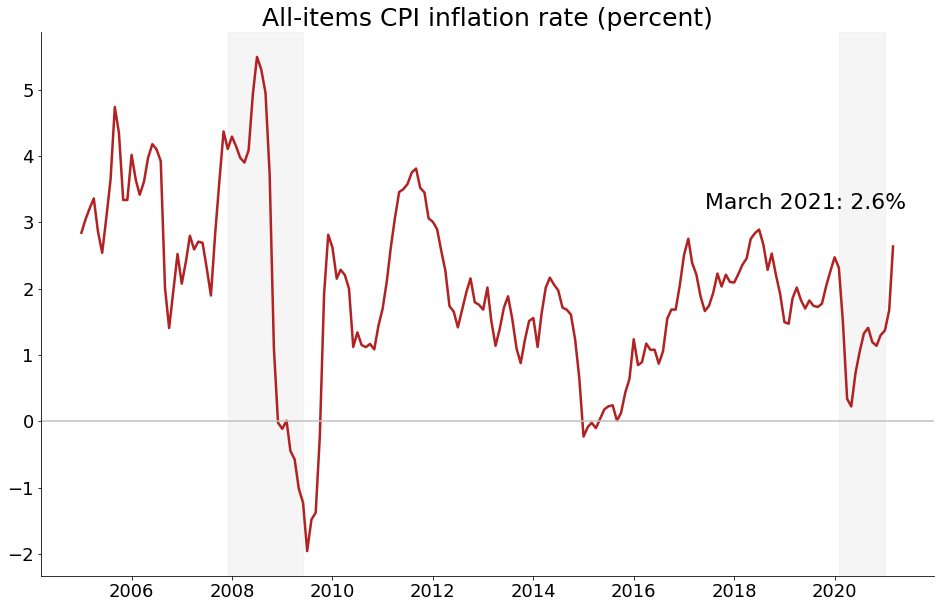

In [11]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(p.index, p.infca, lw=2.5, color='firebrick')

ax.tick_params(axis='both', labelsize=18 )
ax.set_title('All-items CPI inflation rate (percent)', fontsize=25)
ax.axhline(y=0, color='silver')
for c in [33]:
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)
plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,1,1), color='silver', alpha=0.15)

ax.text(dt.datetime(2017,6,1), 3.2, 'March 2021: 2.6%', fontsize=22)

sns.despine()
plt.savefig('inf.svg', bbox_inches='tight')

### Money stocks

In [12]:
m = web.DataReader('M2SL', 'fred', start = '2004-01-01')
m.head(2)

,M2SL
DATE,
2004-01-01,6075.5
2004-02-01,6114.3


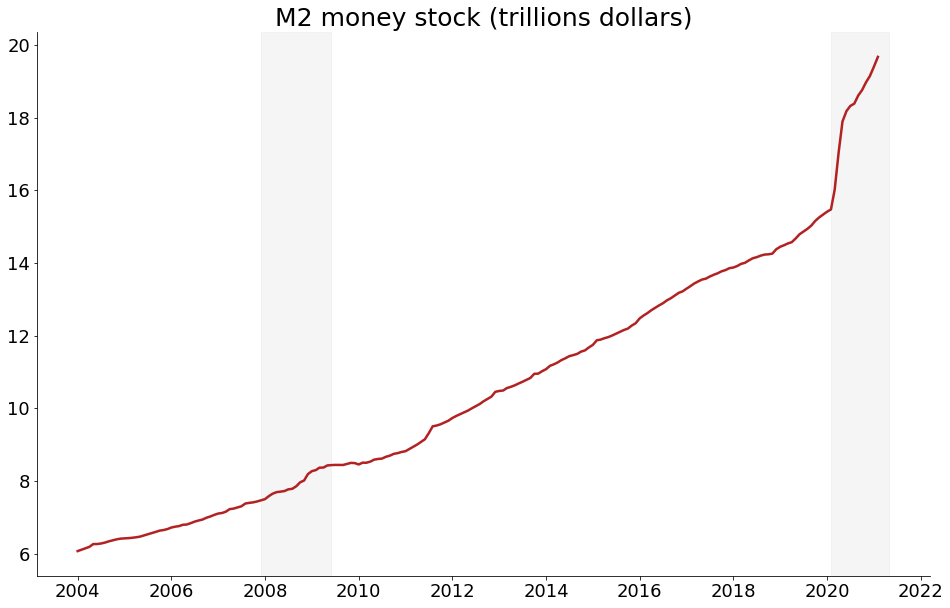

In [13]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(m.index, m.M2SL/1000, lw=2.5, color='firebrick')

ax.tick_params(axis='both', labelsize=18 )
ax.set_title('M2 money stock (trillions dollars)', fontsize=25)

for c in [33]:
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)
plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

sns.despine()
plt.savefig('m2.svg', bbox_inches='tight')

### Federal debt

In [14]:
debt = web.DataReader('GFDEGDQ188S', 'fred', start = '2004-01-01')
debt.head(1)

,GFDEGDQ188S
DATE,
2004-01-01,59.82355


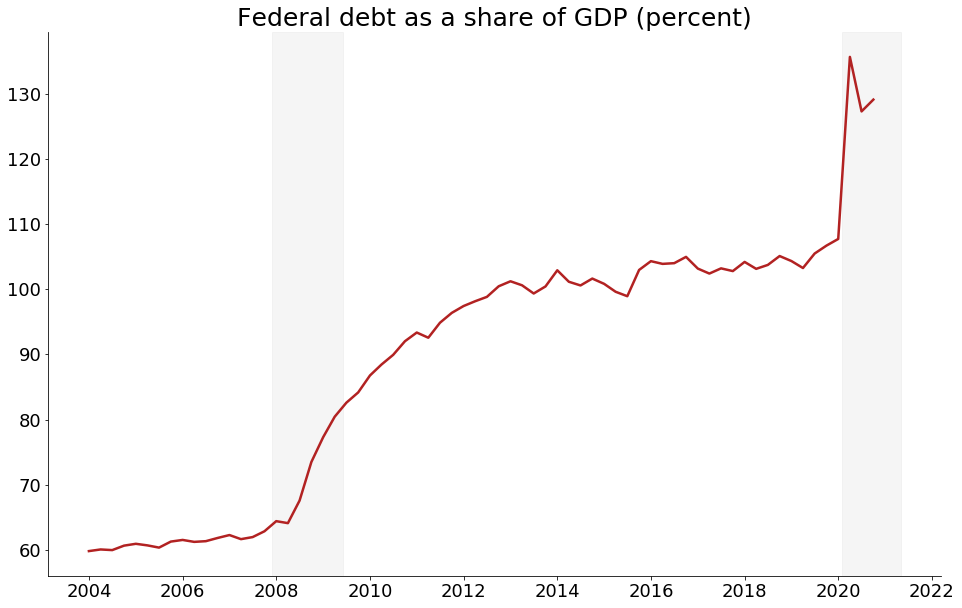

In [15]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(debt.index, debt.GFDEGDQ188S, lw=2.5, color='firebrick')

ax.tick_params(axis='both', labelsize=18 )
ax.set_title('Federal debt as a share of GDP (percent)', fontsize=25)
sns.despine()

for c in [33]:
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)
plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

plt.savefig('debt.svg', bbox_inches='tight')

### Interest rates on government debt

In [16]:
i = web.DataReader(['WGS10YR', 'WGS1YR'], 'fred', start = '2010-01-01')
i.head(1)

,WGS10YR,WGS1YR
DATE,,
2010-01-01,3.83,0.47


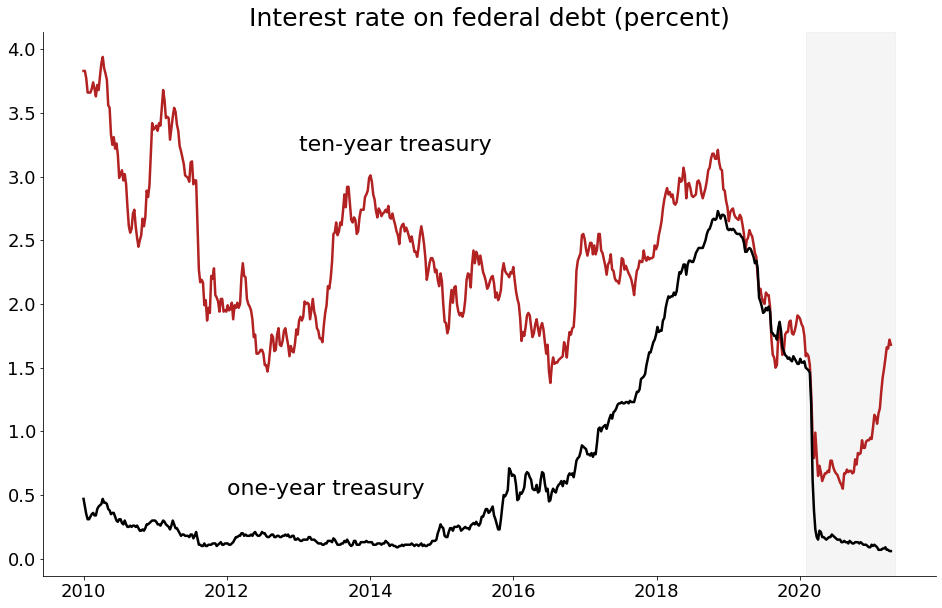

In [17]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(i.index, i.WGS10YR, lw=2.5, color='firebrick')
ax.plot(i.index, i.WGS1YR, lw=2.5, color='black')

ax.tick_params(axis='both', labelsize=18 )
ax.set_title('Interest rate on federal debt (percent)', fontsize=25)
ax.text(dt.datetime(2012,1,1), 0.5, 'one-year treasury', fontsize=22)
ax.text(dt.datetime(2013,1,1), 3.2, 'ten-year treasury', fontsize=22)
plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)
sns.despine()

plt.savefig('rates.svg', bbox_inches='tight')

### Interest payments as a share of tax revenue

In [18]:
share = pd.read_csv('intshare.csv', parse_dates=['DATE'])
share.tail(1)

,DATE,FYOINT_W006RC1Q027SBEA
73,2020-01-01,16.6563


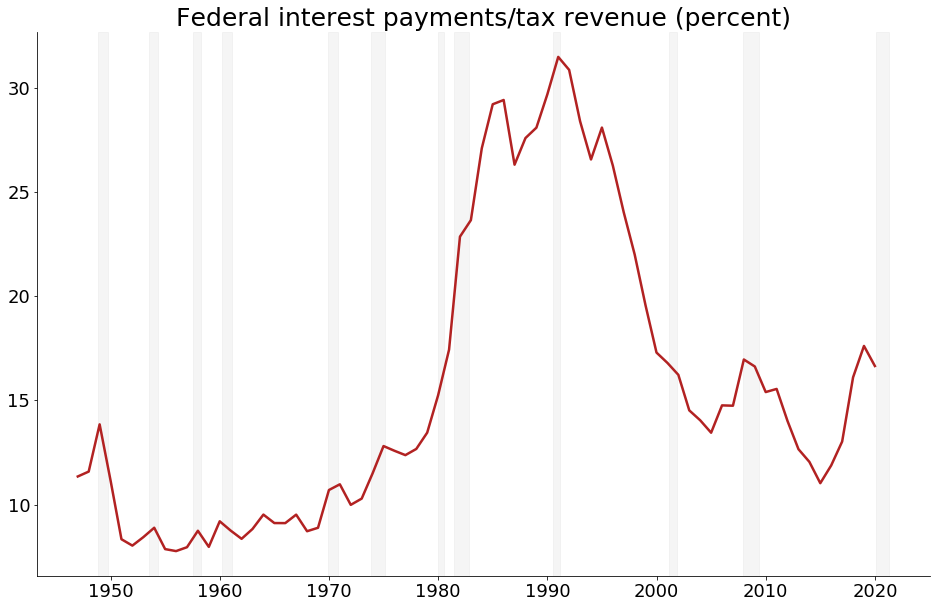

In [19]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(share.DATE, share.FYOINT_W006RC1Q027SBEA, lw=2.5, color='firebrick')

ax.tick_params(axis='both', labelsize=18 )
ax.set_title('Federal interest payments/tax revenue (percent)', fontsize=25)
sns.despine()

for c in range(23,34):
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)
plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

plt.savefig('share.svg', bbox_inches='tight')